**MIMIC Visualization (AI 395T) - Seth Zapata (shz256)**

In [2]:
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

##**Retrieving cohort data from "The Indwelling Arterial Catheter Clinical dataset"**

Note: Data is compiled into one complete table, called `full_cohort_data.csv` containing the collected subject metrics by column.

In [16]:
d1 = files.upload()
cohort_data = pd.read_csv('full_cohort_data.csv')

Saving full_cohort_data.csv to full_cohort_data.csv


In [20]:
cohort_data

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1.0,75.0,29.912791,15.0,9.0,SICU,...,354.0,138.0,4.6,15.0,109.0,41.0,1.6,196.0,39.0,2230.875000
1,0,1.14,1,64.92076,0.0,55.0,20.121312,NaN,5.0,MICU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.000000
2,0,2.86,5,36.50000,0.0,70.0,27.118272,16.0,5.0,MICU,...,295.0,144.0,3.9,17.0,101.0,16.0,0.8,298.0,30.0,2086.800293
3,1,0.58,3,44.49191,0.0,NaN,NaN,21.0,7.0,SICU,...,262.0,139.0,4.2,31.0,100.0,16.0,0.5,146.0,23.0,NaN
4,1,1.75,5,23.74217,1.0,95.2,28.464563,18.0,7.0,SICU,...,22.0,146.0,3.4,19.0,110.0,10.0,1.0,134.0,30.0,2358.244141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,1,26.90,31,68.48606,1.0,76.6,NaN,17.0,8.0,MICU,...,294.0,135.0,3.4,23.0,100.0,17.0,0.9,253.0,35.0,100.117500
1772,1,3.70,4,72.44020,0.0,60.0,NaN,14.0,5.0,SICU,...,363.0,138.0,6.3,22.0,104.0,20.0,0.8,154.0,45.0,289.950012
1773,0,2.87,3,22.70098,1.0,69.0,NaN,16.0,5.0,MICU,...,121.0,134.0,4.1,23.0,105.0,27.0,0.6,NaN,NaN,157.500000
1774,1,22.63,23,53.74423,1.0,124.4,NaN,18.0,9.0,SICU,...,374.0,137.0,4.6,21.0,99.0,13.0,1.1,84.0,31.0,21.770000


##**Figure 1: Scatter Plot (BMI vs. LOS ICU)**

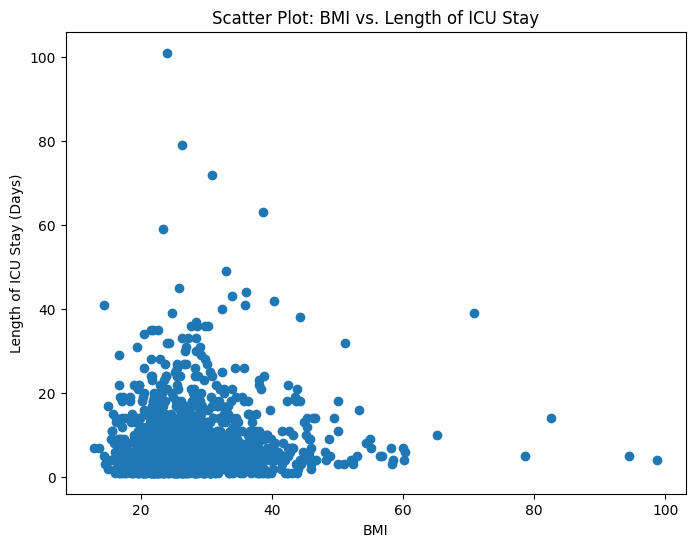

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(cohort_data['bmi'], cohort_data['hospital_los_day'])
plt.xlabel('BMI')
plt.ylabel('Length of ICU Stay (Days)')
plt.title('Scatter Plot: BMI vs. Length of ICU Stay')
plt.show()


##**Figure 2: Grouped bar chart (Gender vs. Condition Presence)**

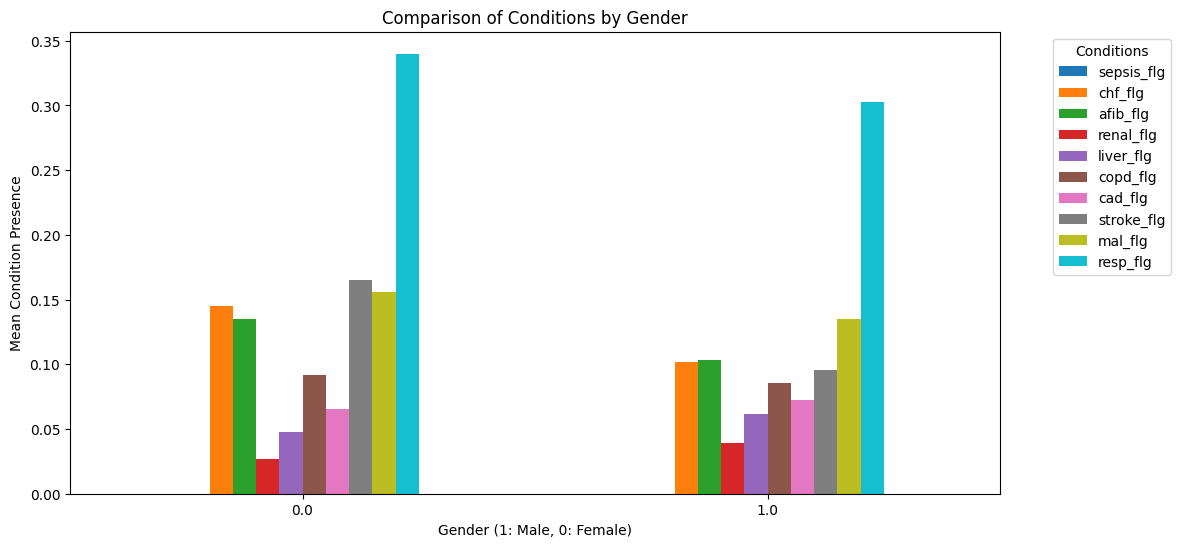

In [75]:
grouped_data = cohort_data.groupby('gender_num')[['sepsis_flg', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg', 'mal_flg', 'resp_flg']].mean()

ax = grouped_data.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Gender (1: Male, 0: Female)')
plt.ylabel('Mean Condition Presence')
plt.title('Comparison of Conditions by Gender')

plt.legend(title='Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)

plt.show()


##**Figure 3: Box Plot (Relationship of Mortality and WBC)**

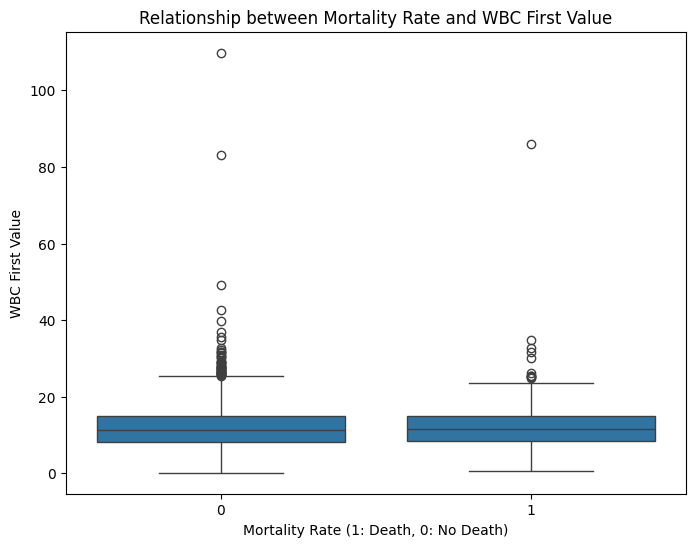

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='hosp_exp_flg', y='wbc_first', data=cohort_data)
plt.xlabel('Mortality Rate (1: Death, 0: No Death)')
plt.ylabel('WBC First Value')
plt.title('Relationship between Mortality Rate and WBC First Value')
plt.show()


##**Figure 4: Line plot (Potassium levels by Gender over time)**

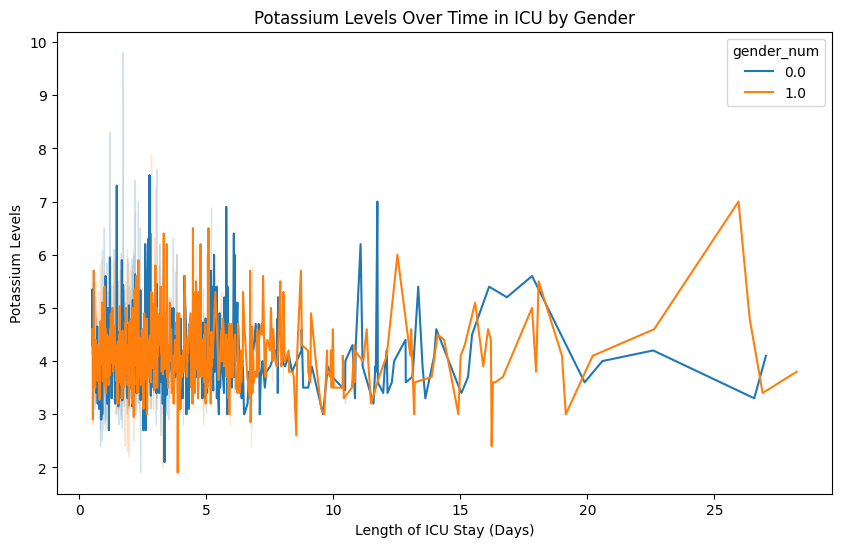

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='icu_los_day', y='potassium_first', hue='gender_num', data=cohort_data)
plt.xlabel('Length of ICU Stay (Days)')
plt.ylabel('Potassium Levels')
plt.title('Potassium Levels Over Time in ICU by Gender')
plt.show()


##**Figure 5: Regression scatter plot (HGB against BMI)**

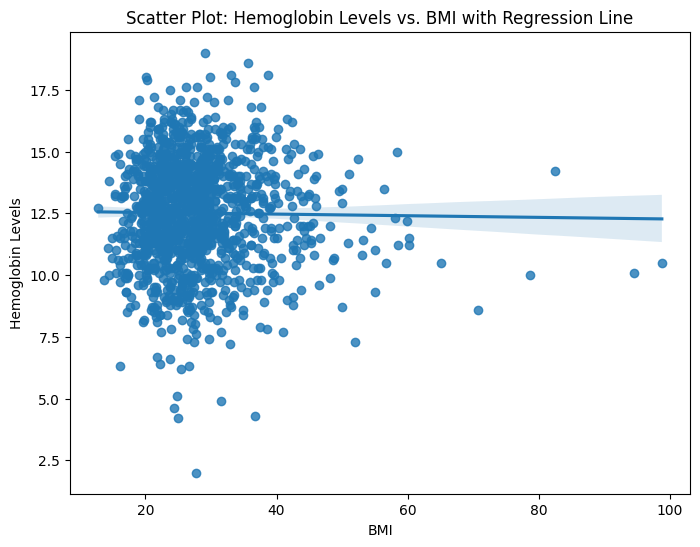

In [69]:
plt.figure(figsize=(8, 6))
sns.regplot(x='bmi', y='hgb_first', data=cohort_data)
plt.xlabel('BMI')
plt.ylabel('Hemoglobin Levels')
plt.title('Scatter Plot: Hemoglobin Levels vs. BMI with Regression Line')
plt.show()


##**Bonus Figure: Plotly Dash scatter plot (interactive - Age vs. BMI in regard to Mortality)**

In [73]:
!pip install dash
!pip install plotly

import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)

fig = px.scatter(cohort_data, x="age", y="bmi", color="hosp_exp_flg",
                 hover_data=['age', 'bmi', 'hosp_exp_flg'],
                 title="Age vs BMI with Mortality Risk")

app.layout = html.Div(children=[
    html.H1(children="Age vs BMI with Mortality Risk"),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>